In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from scipy.stats import zscore

In [94]:
df = pd.read_csv('data.csv')

In [3]:
df

,Y,Data,XAU BGNL,ECSURPUS,BDIY,CRY,DXY,JPY,GBP,Cl1,...,LP01TREU,EMUSTRUU,LF94TRUU,MXUS,MXEU,MXJP,MXBR,MXRU,MXIN,MXCN
0,0,1/11/2000,283.25,0.077,1388.0,157.2600,100.560,105.86,1.6460,25.77,...,116.4640,230.527,123.7620,1416.12,127.75,990.59,856.76,224.33,217.34,34.30
1,0,1/18/2000,287.65,0.043,1405.0,165.0100,101.860,105.47,1.6380,28.85,...,117.2670,231.377,123.7620,1428.79,129.50,993.98,925.22,234.37,227.08,32.74
2,0,1/25/2000,287.15,0.135,1368.0,167.2400,102.410,106.04,1.6500,28.28,...,117.9950,232.390,123.7620,1385.93,126.48,974.83,886.93,216.82,233.00,32.46
3,0,2/1/2000,282.75,0.191,1311.0,166.8500,104.920,107.85,1.6110,28.22,...,120.5100,231.942,122.3280,1385.31,129.19,1007.12,842.60,201.89,237.48,31.29
4,1,2/8/2000,298.40,0.312,1277.0,165.4300,104.220,109.30,1.6110,28.02,...,118.7910,237.812,122.3280,1411.95,134.67,1034.58,945.15,218.00,258.02,31.32
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1106,0,3/23/2021,1727.96,0.339,2271.0,184.5022,92.336,108.72,1.3760,57.76,...,427.7972,1249.403,389.8500,3800.77,140.32,1199.57,1671.73,681.21,1695.96,110.83
1107,0,3/30/2021,1685.56,0.303,2103.0,184.8741,93.297,110.29,1.3719,60.55,...,428.6578,1242.264,385.8145,3835.96,142.76,1206.29,1635.57,693.38,1690.76,108.80
1108,0,4/6/2021,1743.28,0.440,2092.0,185.8393,92.335,109.88,1.3822,59.33,...,430.6649,1250.256,390.6819,3955.16,144.13,1194.62,1689.62,673.20,1689.48,111.92
1109,0,4/13/2021,1742.69,0.467,2140.0,188.1368,91.852,109.19,1.3737,60.18,...,430.4087,1252.563,390.3848,4027.05,144.23,1197.06,1680.82,680.23,1672.46,108.40


In [4]:
df.head()

,Y,Data,XAU BGNL,ECSURPUS,BDIY,CRY,DXY,JPY,GBP,Cl1,...,LP01TREU,EMUSTRUU,LF94TRUU,MXUS,MXEU,MXJP,MXBR,MXRU,MXIN,MXCN
0,0,1/11/2000,283.25,0.077,1388.0,157.26,100.56,105.86,1.646,25.77,...,116.464,230.527,123.762,1416.12,127.75,990.59,856.76,224.33,217.34,34.30
1,0,1/18/2000,287.65,0.043,1405.0,165.01,101.86,105.47,1.638,28.85,...,117.267,231.377,123.762,1428.79,129.50,993.98,925.22,234.37,227.08,32.74
2,0,1/25/2000,287.15,0.135,1368.0,167.24,102.41,106.04,1.650,28.28,...,117.995,232.390,123.762,1385.93,126.48,974.83,886.93,216.82,233.00,32.46
3,0,2/1/2000,282.75,0.191,1311.0,166.85,104.92,107.85,1.611,28.22,...,120.510,231.942,122.328,1385.31,129.19,1007.12,842.60,201.89,237.48,31.29
4,1,2/8/2000,298.40,0.312,1277.0,165.43,104.22,109.30,1.611,28.02,...,118.791,237.812,122.328,1411.95,134.67,1034.58,945.15,218.00,258.02,31.32


In [5]:
df.describe()

,Y,XAU BGNL,ECSURPUS,BDIY,CRY,DXY,JPY,GBP,Cl1,VIX,...,LP01TREU,EMUSTRUU,LF94TRUU,MXUS,MXEU,MXJP,MXBR,MXRU,MXIN,MXCN
count,1111.000000,1111.000000,1111.000000,1111.000000,1111.000000,1111.000000,1111.000000,1111.000000,1111.000000,1111.000000,...,1111.000000,1111.000000,1111.000000,1111.000000,1111.000000,1111.000000,1111.000000,1111.000000,1111.000000,1111.000000
mean,0.213321,987.463744,0.036153,2259.860486,245.247670,90.934982,106.605734,1.569661,60.708101,19.992169,...,232.109985,704.379545,259.052717,1606.997102,107.877138,784.846292,1903.216436,648.681377,693.156616,53.933159
std,0.409837,494.623740,0.349453,2017.811888,68.278066,11.379095,12.840754,0.212344,25.900813,8.642157,...,109.917628,309.951757,75.934451,698.481956,20.795973,200.076443,986.468254,299.096020,405.527014,24.738356
min,0.000000,256.680000,-0.974000,291.000000,106.293000,71.329000,75.940000,1.172000,10.010000,9.430000,...,80.797000,230.527000,121.331000,663.690000,56.300000,431.710000,280.500000,151.250000,112.600000,13.460000
25%,0.000000,433.740000,-0.191000,990.000000,184.705550,81.240500,101.565000,1.418000,39.625000,13.640000,...,131.025000,434.661000,205.315500,1103.925000,90.605000,601.615000,1042.645000,463.195000,278.385000,28.565000
50%,0.000000,1137.800000,0.035000,1518.000000,234.560000,89.716000,108.720000,1.562000,57.400000,17.980000,...,213.205000,714.807000,264.770000,1324.430000,111.320000,786.830000,1860.960000,612.930000,691.530000,58.740000
75%,0.000000,1324.825000,0.260500,2685.500000,301.539500,97.404000,116.220000,1.677500,79.640000,23.625000,...,342.884500,939.824500,320.753000,1992.445000,126.470000,965.875000,2533.770000,793.620000,1014.750000,68.460000
max,1.000000,2006.910000,0.991000,11793.000000,467.570000,119.820000,134.630000,2.085000,140.970000,75.910000,...,431.552800,1286.353000,398.706500,4043.690000,146.390000,1210.580000,4721.360000,1617.640000,1730.510000,129.200000


In [9]:
df [df['Y'] == 0].describe()

,Y,Data,XAU BGNL,ECSURPUS,BDIY,CRY,DXY,JPY,GBP,Cl1,...,LP01TREU,EMUSTRUU,LF94TRUU,MXUS,MXEU,MXJP,MXBR,MXRU,MXIN,MXCN
count,874.0,874,874.000000,874.000000,874.000000,874.000000,874.000000,874.000000,874.000000,874.000000,...,874.000000,874.000000,874.000000,874.000000,874.000000,874.000000,874.000000,874.000000,874.000000,874.000000
mean,0.0,2011-02-07 03:49:00.961098240,990.433593,0.052664,2347.495423,247.881169,90.323585,107.616281,1.579962,61.653707,...,244.111644,731.721141,265.240222,1677.502025,110.625195,813.943009,1925.515492,671.854016,733.038192,55.859222
min,0.0,2000-01-11 00:00:00,257.100000,-0.873000,291.000000,129.574000,71.329000,76.720000,1.206000,18.080000,...,81.986000,230.527000,121.331000,787.160000,63.760000,443.820000,326.720000,161.560000,125.810000,13.720000
25%,0.0,2005-08-31 18:00:00,448.992500,-0.173750,1019.000000,186.208000,81.486750,102.810000,1.401500,44.560000,...,143.396250,457.186750,206.406000,1130.237500,94.155000,660.890000,1148.162500,493.902500,318.342500,30.380000
50%,0.0,2011-03-04 12:00:00,1177.875000,0.041000,1587.000000,250.235000,89.825000,109.025000,1.574500,58.350000,...,229.733500,733.677500,275.520000,1391.480000,113.575000,814.240000,1876.695000,626.105000,730.030000,60.735000
75%,0.0,2016-07-24 06:00:00,1314.617500,0.251250,2959.250000,301.856500,96.734750,115.855000,1.742750,78.157500,...,348.385250,1003.778750,323.490000,2037.430000,127.905000,977.975000,2424.240000,803.947500,1052.482500,70.410000
max,0.0,2021-04-20 00:00:00,2006.910000,0.991000,11793.000000,449.490000,119.820000,134.630000,2.068000,138.740000,...,431.552800,1286.353000,398.706500,4043.690000,146.390000,1210.580000,4721.360000,1617.640000,1730.510000,129.200000
std,0.0,NaN,472.840491,0.335677,2014.431535,66.348132,10.483254,11.547186,0.221348,24.492175,...,109.666432,306.805151,73.623324,699.762950,19.452209,190.909211,954.034630,286.306596,409.243710,24.792759


In [10]:
df [df['Y'] == 1].describe()

,Y,Data,XAU BGNL,ECSURPUS,BDIY,CRY,DXY,JPY,GBP,Cl1,...,LP01TREU,EMUSTRUU,LF94TRUU,MXUS,MXEU,MXJP,MXBR,MXRU,MXIN,MXCN
count,237.0,237,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000,...,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000
mean,1.0,2009-01-17 08:54:41.012658176,976.511646,-0.024734,1936.683544,235.535947,93.189671,102.879072,1.531673,57.220928,...,187.850703,603.550203,236.234658,1346.991603,97.742954,677.544473,1820.982785,563.226160,546.082785,46.830295
min,1.0,2000-02-08 00:00:00,256.680000,-0.974000,345.000000,106.293000,72.369000,75.940000,1.172000,10.010000,...,80.797000,237.812000,122.002000,663.690000,56.300000,431.710000,280.500000,151.250000,112.600000,13.460000
25%,1.0,2002-08-13 00:00:00,317.050000,-0.289000,971.000000,173.740000,80.899000,89.870000,1.442000,29.480000,...,106.475000,278.383000,144.784000,973.590000,80.820000,504.330000,768.910000,272.040000,177.450000,25.410000
50%,1.0,2009-02-24 00:00:00,901.750000,-0.013000,1366.000000,215.880000,87.581000,107.340000,1.533000,45.940000,...,150.307000,554.560000,247.689000,1193.170000,92.830000,616.170000,1711.270000,533.560000,589.570000,52.290000
75%,1.0,2012-05-15 00:00:00,1601.320000,0.285000,1795.000000,297.170000,106.800000,117.280000,1.585000,86.890000,...,239.939000,810.849000,302.006000,1351.480000,117.180000,852.730000,2807.800000,767.290000,707.360000,59.980000
max,1.0,2020-11-03 00:00:00,1975.060000,0.869000,11039.000000,467.570000,119.620000,133.940000,2.085000,140.970000,...,418.688000,1252.322000,387.906500,3414.210000,144.000000,1082.580000,4430.990000,1562.150000,1395.800000,104.220000
std,0.0,NaN,568.765356,0.390920,2001.477121,74.312577,13.999697,16.265108,0.170275,30.343985,...,99.179127,301.127765,80.027618,630.095194,22.433593,196.878357,1096.095815,328.954032,355.435302,23.242389


In [99]:
df['Data'] = pd.to_datetime(df['Data'])


In [7]:
df

,Y,Data,XAU BGNL,ECSURPUS,BDIY,CRY,DXY,JPY,GBP,Cl1,...,LP01TREU,EMUSTRUU,LF94TRUU,MXUS,MXEU,MXJP,MXBR,MXRU,MXIN,MXCN
0,0,2000-01-11,283.25,0.077,1388.0,157.2600,100.560,105.86,1.6460,25.77,...,116.4640,230.527,123.7620,1416.12,127.75,990.59,856.76,224.33,217.34,34.30
1,0,2000-01-18,287.65,0.043,1405.0,165.0100,101.860,105.47,1.6380,28.85,...,117.2670,231.377,123.7620,1428.79,129.50,993.98,925.22,234.37,227.08,32.74
2,0,2000-01-25,287.15,0.135,1368.0,167.2400,102.410,106.04,1.6500,28.28,...,117.9950,232.390,123.7620,1385.93,126.48,974.83,886.93,216.82,233.00,32.46
3,0,2000-02-01,282.75,0.191,1311.0,166.8500,104.920,107.85,1.6110,28.22,...,120.5100,231.942,122.3280,1385.31,129.19,1007.12,842.60,201.89,237.48,31.29
4,1,2000-02-08,298.40,0.312,1277.0,165.4300,104.220,109.30,1.6110,28.02,...,118.7910,237.812,122.3280,1411.95,134.67,1034.58,945.15,218.00,258.02,31.32
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1106,0,2021-03-23,1727.96,0.339,2271.0,184.5022,92.336,108.72,1.3760,57.76,...,427.7972,1249.403,389.8500,3800.77,140.32,1199.57,1671.73,681.21,1695.96,110.83
1107,0,2021-03-30,1685.56,0.303,2103.0,184.8741,93.297,110.29,1.3719,60.55,...,428.6578,1242.264,385.8145,3835.96,142.76,1206.29,1635.57,693.38,1690.76,108.80
1108,0,2021-04-06,1743.28,0.440,2092.0,185.8393,92.335,109.88,1.3822,59.33,...,430.6649,1250.256,390.6819,3955.16,144.13,1194.62,1689.62,673.20,1689.48,111.92
1109,0,2021-04-13,1742.69,0.467,2140.0,188.1368,91.852,109.19,1.3737,60.18,...,430.4087,1252.563,390.3848,4027.05,144.23,1197.06,1680.82,680.23,1672.46,108.40


In [8]:
print("Missing values:\n", df.isnull().sum())


Missing values:
 Y            0
Data         0
XAU BGNL     0
ECSURPUS     0
BDIY         0
CRY          0
DXY          0
JPY          0
GBP          0
Cl1          0
VIX          0
USGG30YR     0
GT10         0
USGG2YR      0
USGG3M       0
US0001M      0
GTDEM30Y     0
GTDEM10Y     0
GTDEM2Y      0
EONIA        0
GTITL30YR    0
GTITL10YR    0
GTITL2YR     0
GTJPY30YR    0
GTJPY10YR    0
GTJPY2YR     0
GTGBP30Y     0
GTGBP20Y     0
GTGBP2Y      0
LUMSTRUU     0
LMBITR       0
LUACTRUU     0
LF98TRUU     0
LG30TRUU     0
LP01TREU     0
EMUSTRUU     0
LF94TRUU     0
MXUS         0
MXEU         0
MXJP         0
MXBR         0
MXRU         0
MXIN         0
MXCN         0
dtype: int64


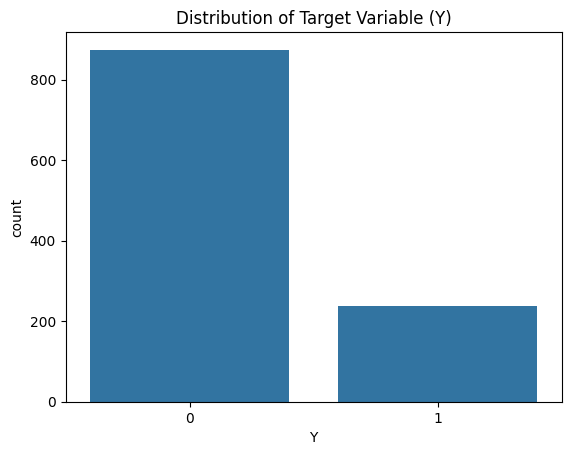

In [15]:
sns.countplot(x='Y', data=df)
plt.title('Distribution of Target Variable (Y)')
plt.show()

In [11]:
numeric_df = df.select_dtypes(include=[np.number])
numeric_df.corr()

,Y,XAU BGNL,ECSURPUS,BDIY,CRY,DXY,JPY,GBP,Cl1,VIX,...,LP01TREU,EMUSTRUU,LF94TRUU,MXUS,MXEU,MXJP,MXBR,MXRU,MXIN,MXCN
Y,1.000000,-0.011535,-0.090772,-0.083440,-0.074102,0.103227,-0.151197,-0.093201,-0.070141,0.598432,...,-0.209774,-0.169475,-0.156550,-0.193928,-0.253877,-0.279399,-0.043429,-0.148848,-0.188942,-0.149581
XAU BGNL,-0.011535,1.000000,0.114798,-0.315007,0.015316,-0.428891,-0.576191,-0.422084,0.515215,-0.075873,...,0.817990,0.891486,0.925465,0.625814,0.176177,0.036654,0.581667,0.339929,0.831756,0.829659
ECSURPUS,-0.090772,0.114798,1.000000,-0.102022,-0.139779,0.074835,-0.070422,-0.188233,-0.016245,-0.094127,...,0.115747,0.110335,0.073268,0.192180,0.014535,0.034829,-0.014098,-0.077750,0.102198,0.115145
BDIY,-0.083440,-0.315007,-0.102022,1.000000,0.596182,-0.441793,0.062822,0.756718,0.286396,-0.045367,...,-0.410941,-0.350372,-0.241704,-0.300277,-0.058349,0.103124,0.337489,0.606526,-0.240799,-0.033084
CRY,-0.074102,0.015316,-0.139779,0.596182,1.000000,-0.798564,-0.412364,0.793954,0.785614,-0.190060,...,-0.315491,-0.218547,-0.045101,-0.458623,-0.261605,-0.235202,0.641511,0.761661,-0.210901,-0.031605
DXY,0.103227,-0.428891,0.074835,-0.441793,-0.798564,1.000000,0.650429,-0.544966,-0.816378,0.115712,...,-0.074069,-0.201703,-0.386866,0.144988,0.300674,0.247446,-0.776353,-0.756141,-0.188670,-0.352379
JPY,-0.151197,-0.576191,-0.070422,0.062822,-0.412364,0.650429,1.000000,-0.008633,-0.608209,-0.134791,...,-0.113902,-0.225936,-0.330176,0.115772,0.392934,0.557078,-0.639573,-0.306819,-0.149469,-0.269353
GBP,-0.093201,-0.422084,-0.188233,0.756718,0.793954,-0.544966,-0.008633,1.000000,0.352787,-0.124496,...,-0.598572,-0.549016,-0.402361,-0.594595,-0.246342,-0.113736,0.224720,0.530964,-0.501925,-0.329350
Cl1,-0.070141,0.515215,-0.016245,0.286396,0.785614,-0.816378,-0.608209,0.352787,1.000000,-0.213999,...,0.196312,0.292426,0.438823,-0.029697,-0.062125,-0.160278,0.861036,0.759998,0.284056,0.430908
VIX,0.598432,-0.075873,-0.094127,-0.045367,-0.190060,0.115712,-0.134791,-0.124496,-0.213999,1.000000,...,-0.310635,-0.253247,-0.227376,-0.239029,-0.421996,-0.367709,-0.098962,-0.247953,-0.243126,-0.164591


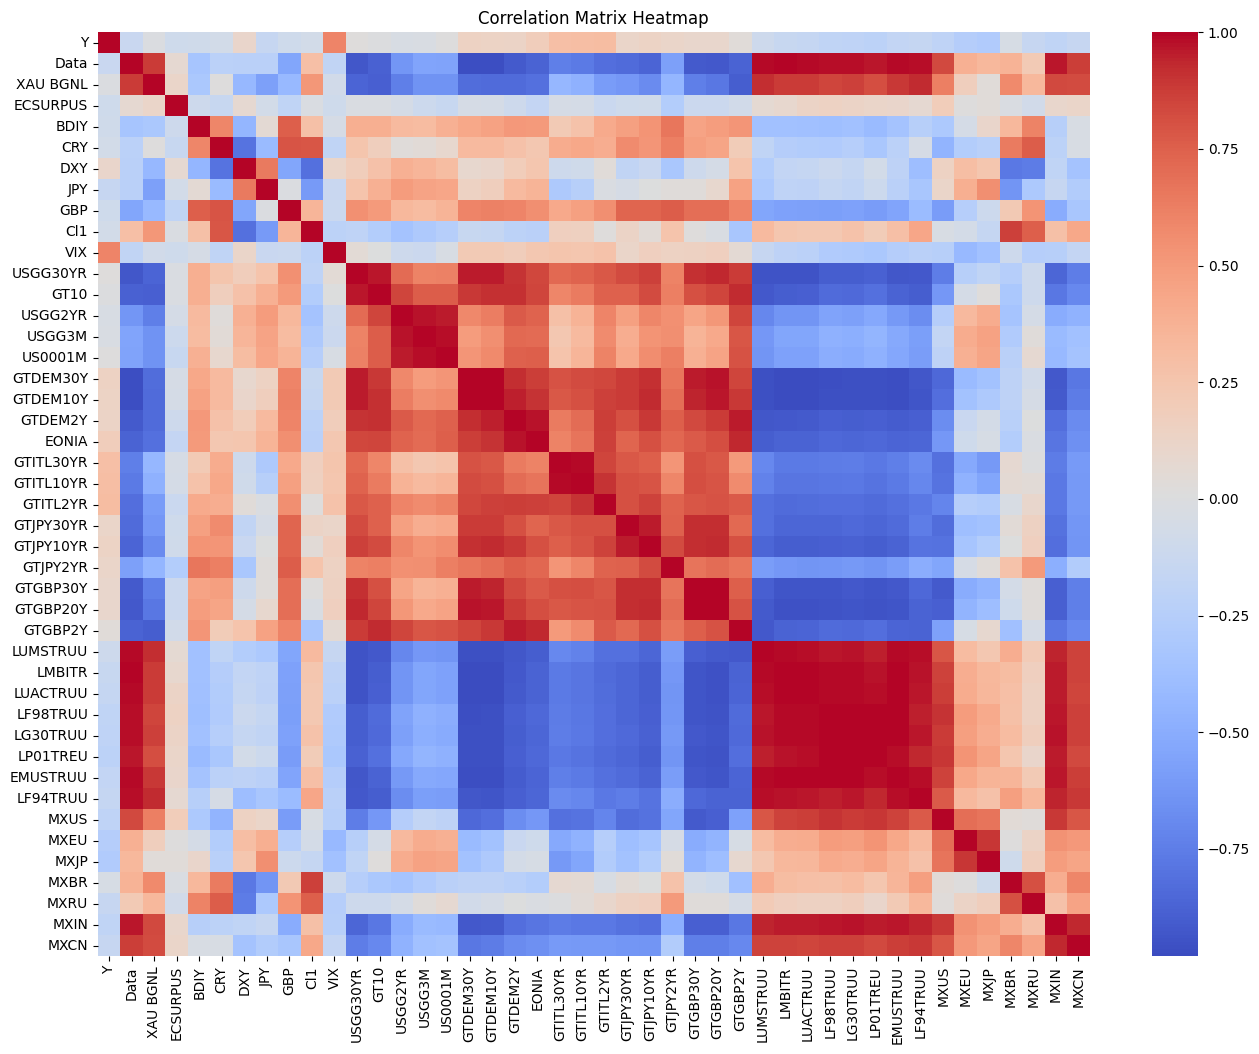

In [13]:
plt.figure(figsize=(16, 12))
sns.heatmap(correlation_matrix, annot=False, cmap='coolwarm')
plt.title('Correlation Matrix Heatmap')
plt.show()

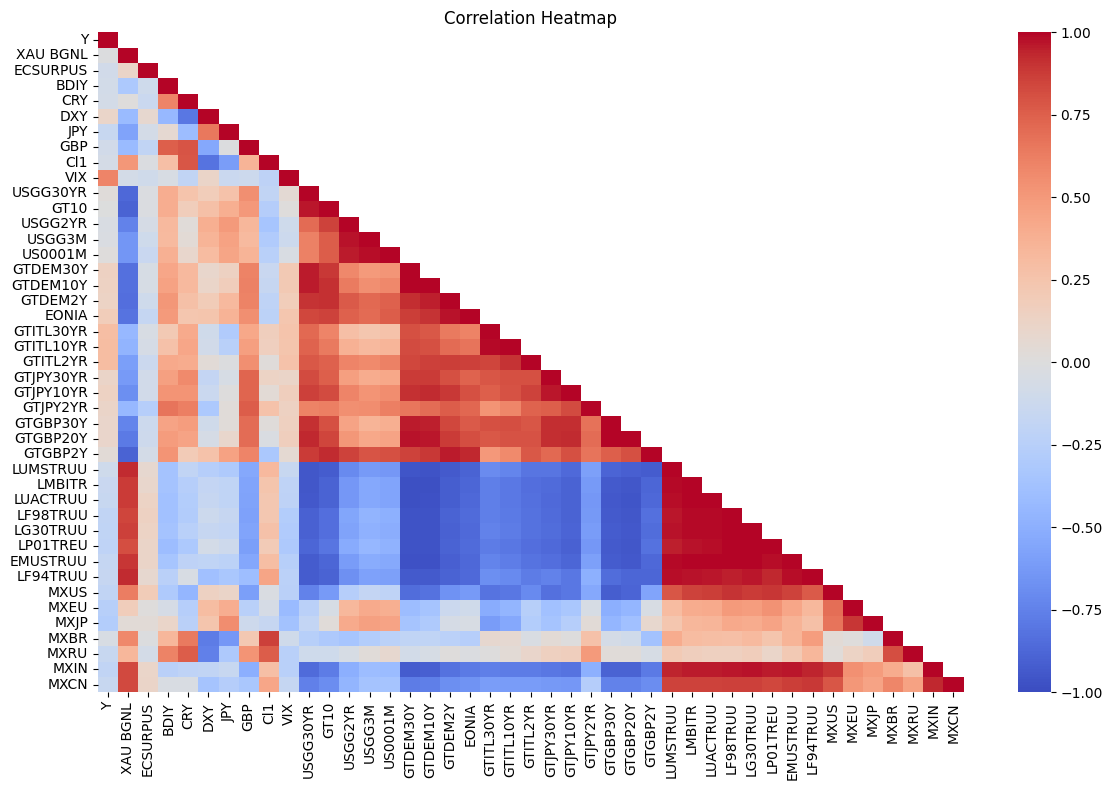

In [14]:
corr_matrix = numeric_df.corr()
upper_triangle = np.triu(corr_matrix)
mask = np.triu(np.ones_like(corr_matrix), k=1)

plt.figure(figsize=(12, 8))

sns.heatmap(corr_matrix,
            mask=mask,
            annot=False,
            cmap='coolwarm',
            vmin=-1,
            vmax=1,
            center=0)

plt.title('Correlation Heatmap')
plt.tight_layout()
plt.show()

In [16]:
correraltions = numeric_df.corr()['Y'].sort_values(ascending=False)
print("Top feature correraltions with target")
print(correraltions)

Top feature correraltions with target
Y            1.000000
VIX          0.598432
GTITL2YR     0.304528
GTITL10YR    0.297573
GTITL30YR    0.295000
EONIA        0.180311
GTDEM30Y     0.141537
GTDEM10Y     0.139933
GTJPY10YR    0.133660
GTDEM2Y      0.130607
GTJPY30YR    0.114555
GTJPY2YR     0.112314
DXY          0.103227
GTGBP20Y     0.100142
GTGBP30Y     0.099777
GTGBP2Y      0.035010
USGG30YR     0.019255
US0001M      0.015379
GT10        -0.004776
XAU BGNL    -0.011535
USGG3M      -0.025935
USGG2YR     -0.034909
MXBR        -0.043429
Cl1         -0.070141
CRY         -0.074102
BDIY        -0.083440
ECSURPUS    -0.090772
GBP         -0.093201
LUMSTRUU    -0.104897
LMBITR      -0.143607
MXRU        -0.148848
MXCN        -0.149581
JPY         -0.151197
LUACTRUU    -0.153544
LF94TRUU    -0.156550
EMUSTRUU    -0.169475
MXIN        -0.188942
LF98TRUU    -0.189661
MXUS        -0.193928
LG30TRUU    -0.197232
LP01TREU    -0.209774
MXEU        -0.253877
MXJP        -0.279399
Name: Y, dtype: 

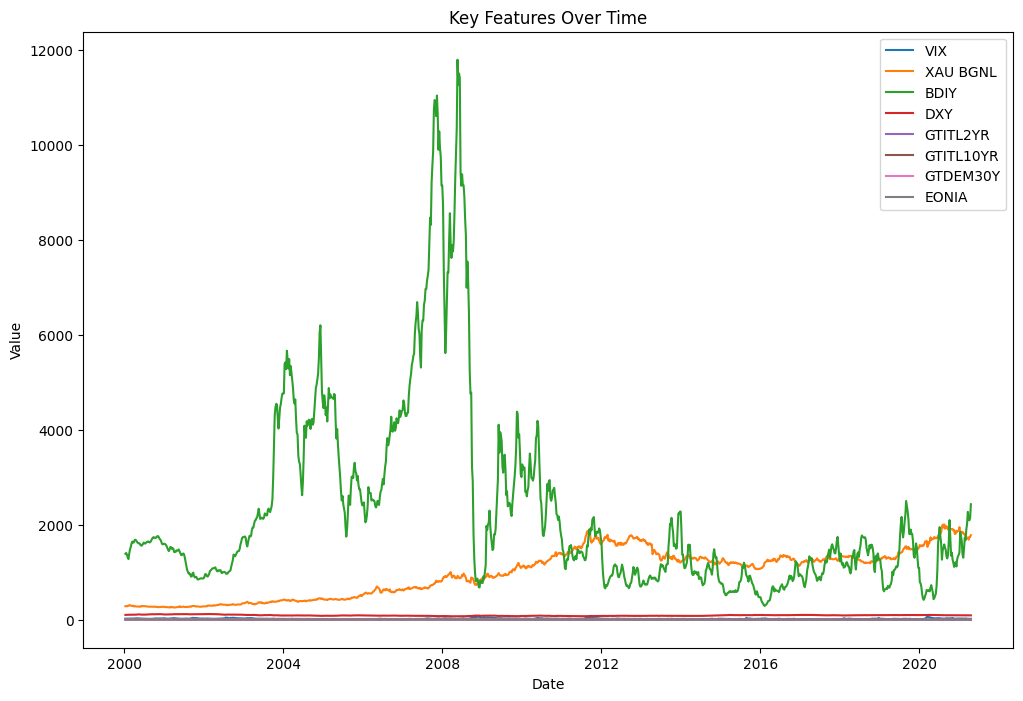

In [17]:
key_columns = [ 'VIX', 'XAU BGNL', 'BDIY', 'DXY', 'GTITL2YR', 'GTITL10YR', 'GTDEM30Y','EONIA' ]
plt.figure(figsize=(12, 8))
for col in key_columns:
    plt.plot(df['Data'], df[col], label=col)

plt.legend()
plt.title('Key Features Over Time')
plt.xlabel('Date')
plt.ylabel('Value')
plt.show()

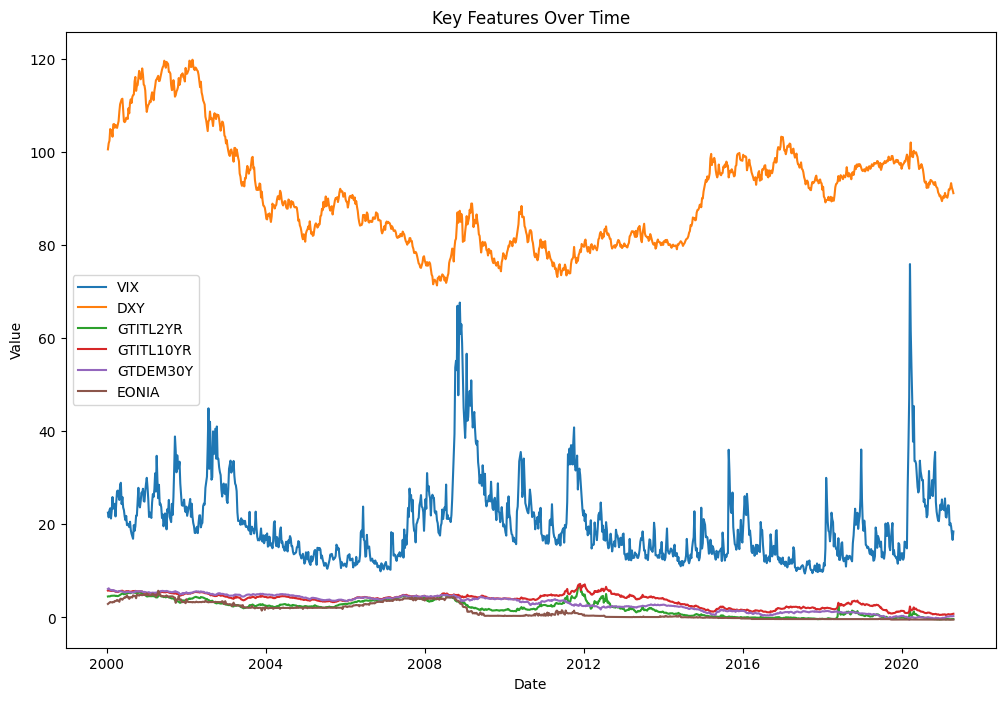

In [19]:
key_columns = [ 'VIX',  'DXY', 'GTITL2YR', 'GTITL10YR', 'GTDEM30Y','EONIA' ]
plt.figure(figsize=(12, 8))
for col in key_columns:
    plt.plot(df['Data'], df[col], label=col)

plt.legend()
plt.title('Key Features Over Time')
plt.xlabel('Date')
plt.ylabel('Value')
plt.show()

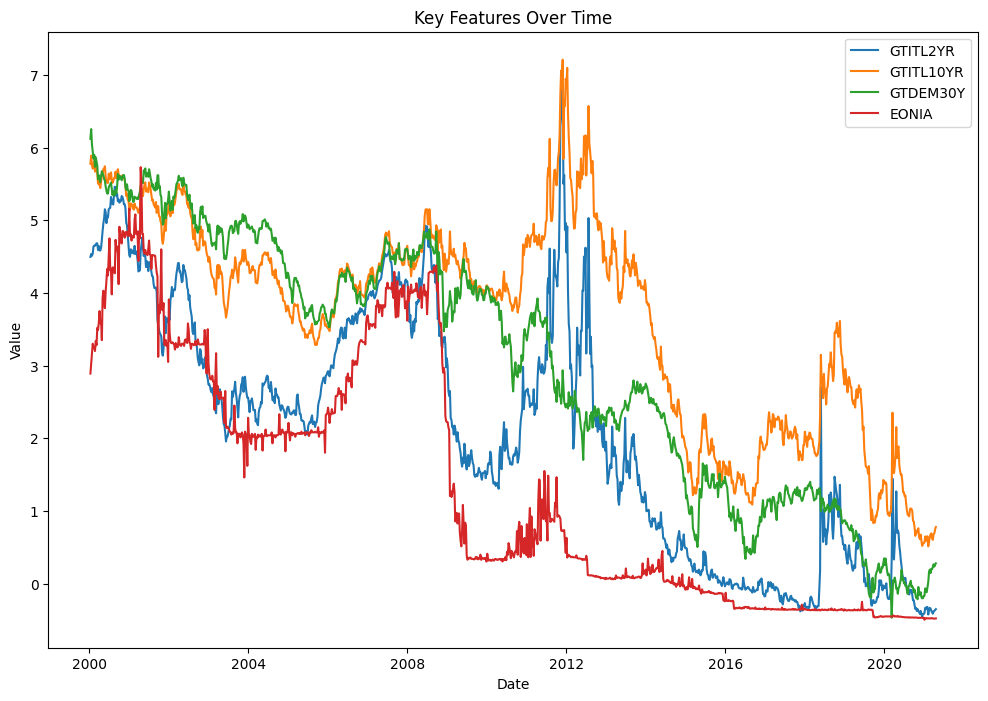

In [20]:
key_columns = ['GTITL2YR', 'GTITL10YR', 'GTDEM30Y','EONIA' ]
plt.figure(figsize=(12, 8))
for col in key_columns:
    plt.plot(df['Data'], df[col], label=col)

plt.legend()
plt.title('Key Features Over Time')
plt.xlabel('Date')
plt.ylabel('Value')
plt.show()

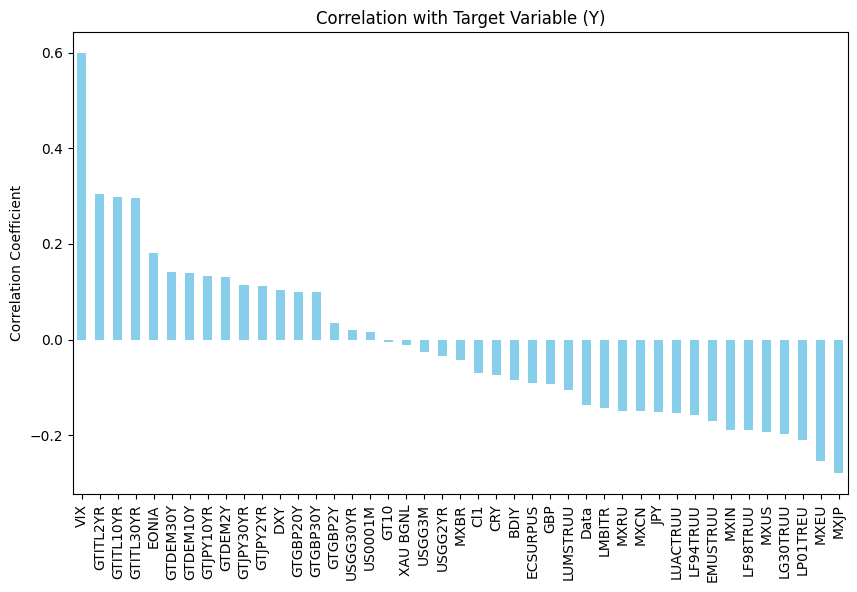

In [22]:
plt.figure(figsize=(10, 6))
corr_with_target.drop('Y').plot(kind='bar', color='skyblue')
plt.title('Correlation with Target Variable (Y)')
plt.ylabel('Correlation Coefficient')
plt.show()


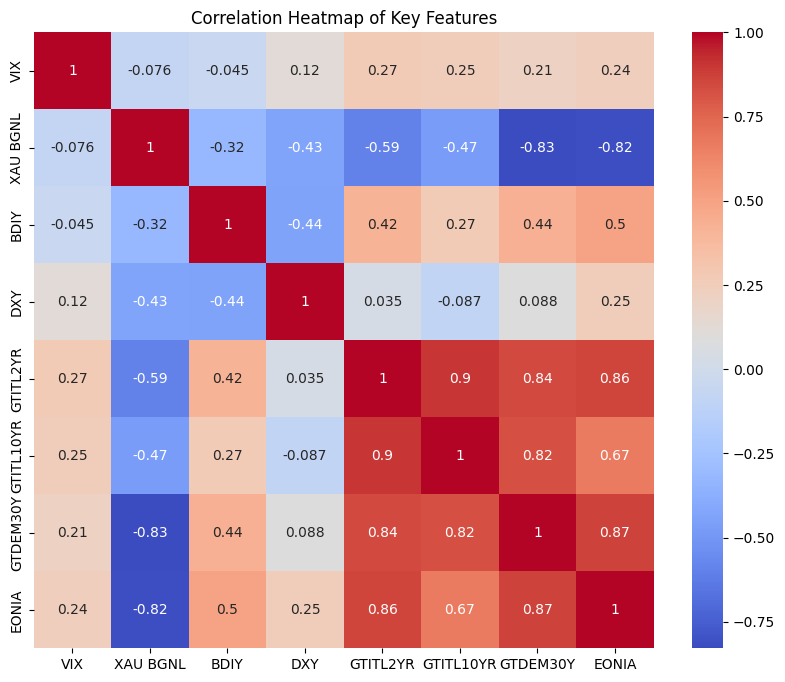

In [30]:
key_columns = [ 'VIX', 'XAU BGNL', 'BDIY', 'DXY', 'GTITL2YR', 'GTITL10YR', 'GTDEM30Y','EONIA' ]
plt.figure(figsize=(10, 8))
sns.heatmap(df[key_columns].corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap of Key Features')
plt.show()

C:\Users\hewan\AppData\Local\Temp\ipykernel_52980\554845878.py:8: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  axes[i].boxplot(data, labels=['Y=0', 'Y=1'])
C:\Users\hewan\AppData\Local\Temp\ipykernel_52980\554845878.py:8: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  axes[i].boxplot(data, labels=['Y=0', 'Y=1'])
C:\Users\hewan\AppData\Local\Temp\ipykernel_52980\554845878.py:8: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  axes[i].boxplot(data, labels=['Y=0', 'Y=1'])
C:\Users\hewan\AppData\Local\Temp\ipykernel_52980\554845878.py:8: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick

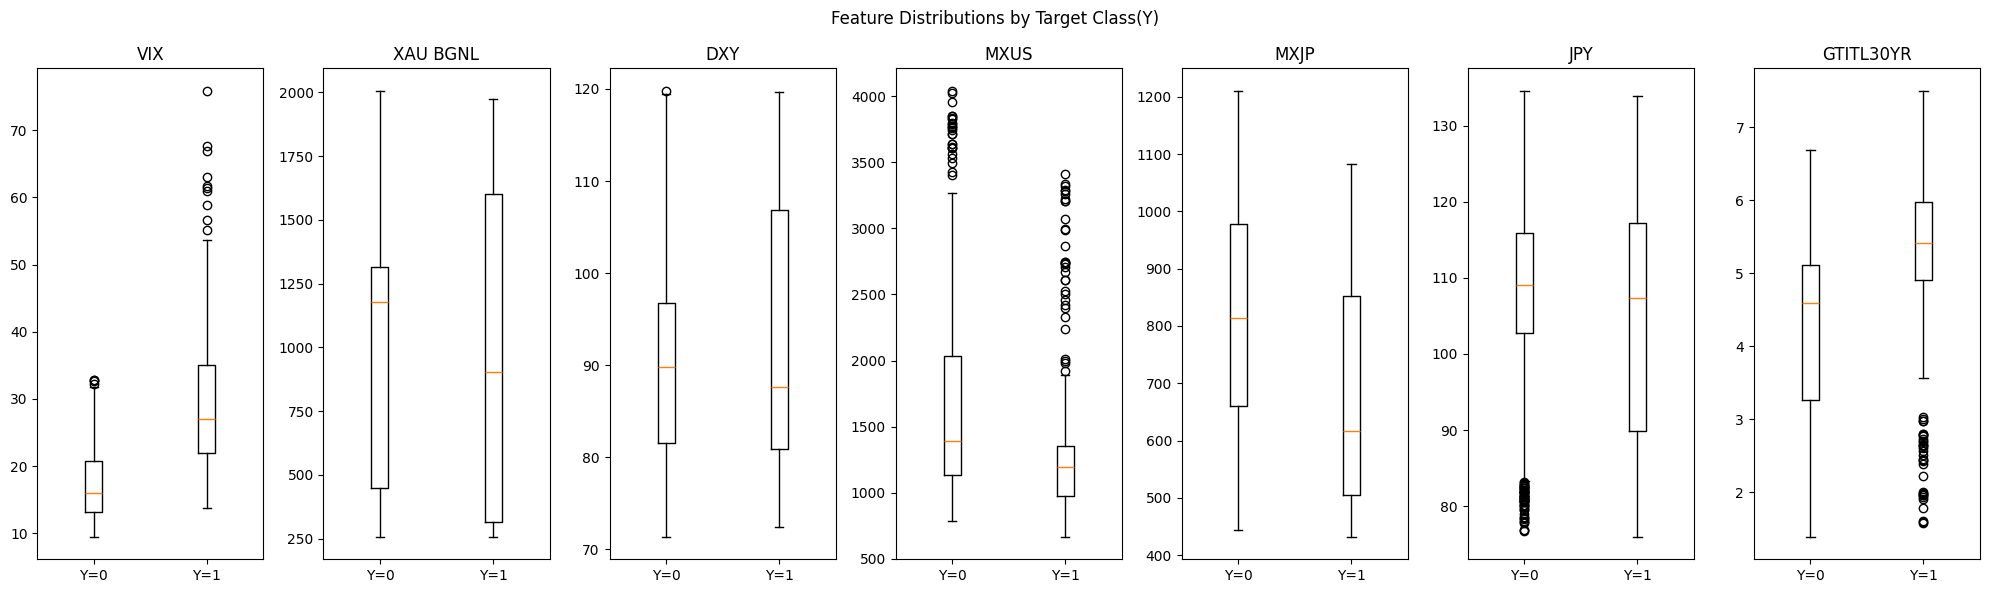

In [24]:
cols_to_plot = ['VIX', 'XAU BGNL', 'DXY', 'MXUS', 'MXJP', 'JPY', 'GTITL30YR']

fig, axes = plt.subplots(1, len(cols_to_plot), figsize=(20, 6))
fig.suptitle('Feature Distributions by Target Class(Y)')

for i, col in enumerate(cols_to_plot):
    data = [df[df['Y'] == 0][col], df[df['Y'] == 1] [col]]
    axes[i].boxplot(data, labels=['Y=0', 'Y=1'])
    axes[i].set_title(col)
    axes[i].tick_params(axis='x', rotation=0)

plt.tight_layout()
plt.show()

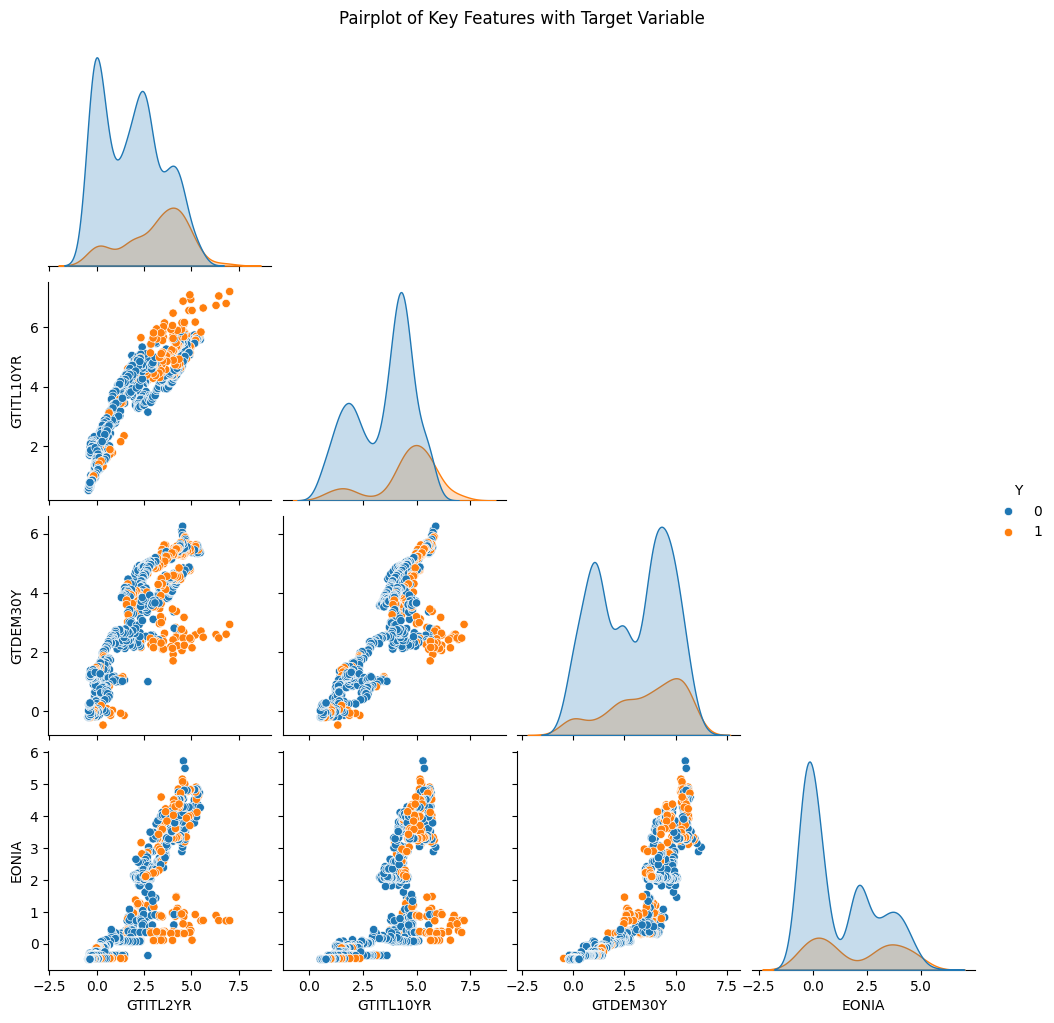

In [26]:
sns.pairplot(df[key_columns + ['Y']], hue='Y', diag_kind='kde', corner=True)
plt.suptitle('Pairplot of Key Features with Target Variable', y=1.02)
plt.show()

<Figure size 2000x600 with 0 Axes>

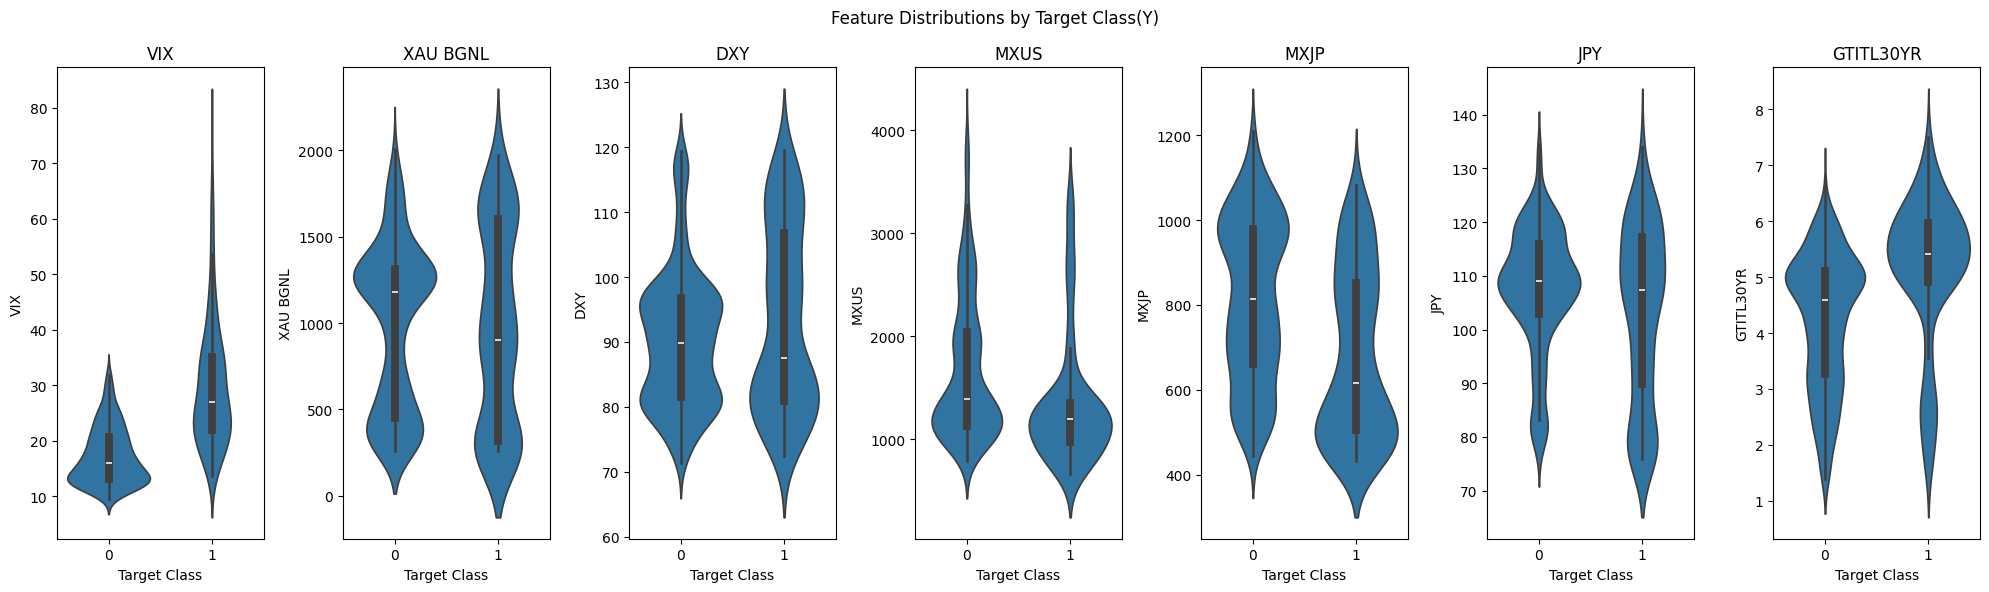

In [31]:
plt.figure(figsize=(20, 6))

fig, axes = plt.subplots(1, len(cols_to_plot), figsize=(20, 6))
fig.suptitle('Feature Distributions by Target Class(Y)')

for i, col in enumerate(cols_to_plot):
    sns.violinplot(
        data=df,
        x="Y",
        y=col,
        ax=axes[i],
        inner='box'
    )

    axes[i].set_title(col)
    axes[i].set_xlabel('Target Class')

plt.tight_layout()
plt.show()

<Figure size 2000x600 with 0 Axes>

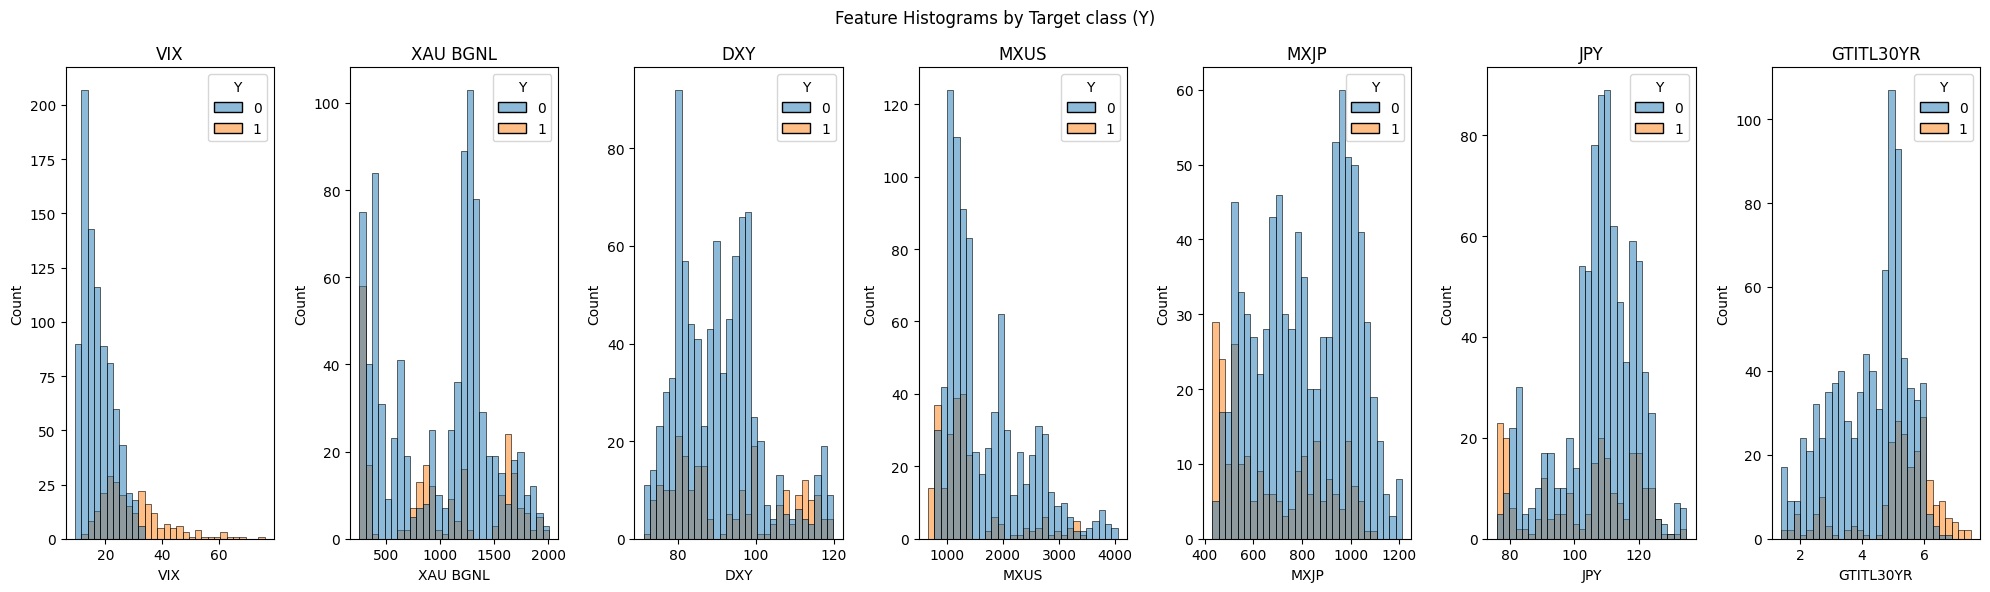

In [35]:
plt.figure(figsize=(20, 6))
fig, axes = plt.subplots(1, len(cols_to_plot), figsize=(20, 6))
fig.suptitle('Feature Histograms by Target class (Y)')

for i, col in enumerate(cols_to_plot):
    sns.histplot(
        data=df,
        x=col,
        hue='Y',
        ax=axes[i],
        multiple='layer',
        alpha=0.5,
        bins=30
    )

    axes[i].set_title(col)

plt.tight_layout()
plt.show()

In [32]:
# Z-score method for numeric anomalies
def detect_anomalies_zscore(data, threshold=3):
    return np.abs(zscore(data)) > threshold

anomalies = {}
for col in key_columns:
    anomalies[col] = detect_anomalies_zscore(df[col])

for col, anomaly in anomalies.items():
    print(f"\nAnomalies detected in {col}:\n", df.loc[anomaly, ['Data', col]])


Anomalies detected in VIX:
            Data    VIX
456  2008-10-07  53.68
457  2008-10-14  55.13
458  2008-10-21  53.11
459  2008-10-28  66.96
460  2008-11-04  47.73
461  2008-11-11  61.44
462  2008-11-18  67.64
463  2008-11-25  60.90
464  2008-12-02  62.98
465  2008-12-09  58.91
466  2008-12-16  52.37
471  2009-01-20  56.65
474  2009-02-10  46.67
475  2009-02-17  48.66
477  2009-03-03  50.93
1052 2020-03-10  47.30
1053 2020-03-17  75.91
1054 2020-03-24  61.67
1055 2020-03-31  53.54
1056 2020-04-07  46.70

Anomalies detected in XAU BGNL:
 Empty DataFrame
Columns: [Data, XAU BGNL]
Index: []

Anomalies detected in BDIY:
           Data     BDIY
400 2007-09-11   8468.0
401 2007-09-18   8313.0
402 2007-09-25   9215.0
403 2007-10-02   9566.0
404 2007-10-09   9860.0
405 2007-10-16  10748.0
406 2007-10-23  10944.0
407 2007-10-30  10886.0
408 2007-11-06  10605.0
409 2007-11-13  11039.0
410 2007-11-20  10647.0
411 2007-11-27   9897.0
412 2007-12-04  10285.0
413 2007-12-11   9929.0
414 2007-12-

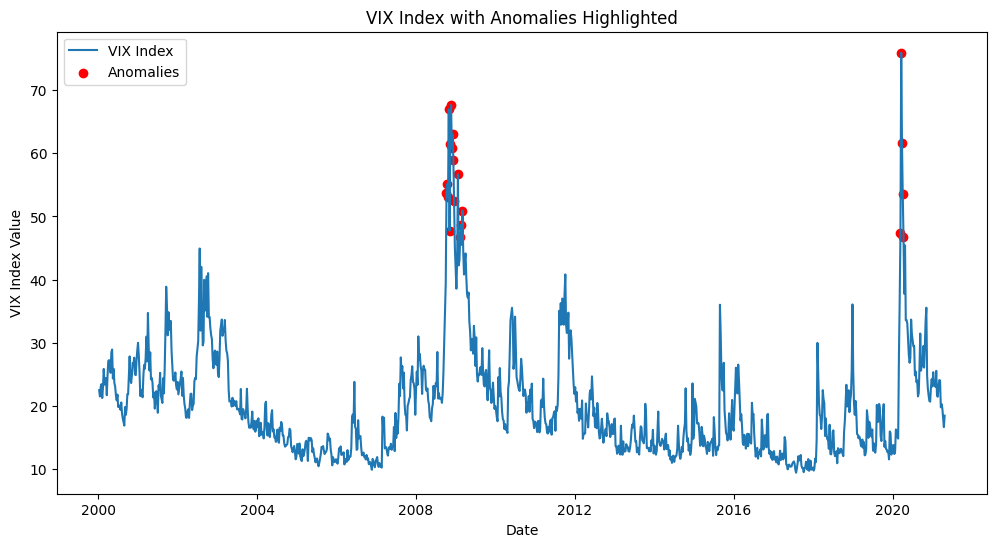

In [34]:
plt.figure(figsize=(12, 6))
plt.plot(df['Data'], df['VIX'], label='VIX Index')
plt.scatter(df.loc[anomalies['VIX'], 'Data'], df.loc[anomalies['VIX'], 'VIX'], 
            color='red', label='Anomalies')
plt.title('VIX Index with Anomalies Highlighted')
plt.xlabel('Date')
plt.ylabel('VIX Index Value')
plt.legend()
plt.show()

In [48]:
print( df.columns.tolist())


['Y', 'Data', 'XAU BGNL', 'ECSURPUS', 'BDIY', 'CRY', 'DXY', 'JPY', 'GBP', 'Cl1', 'VIX', 'USGG30YR', 'GT10', 'USGG2YR', 'USGG3M', 'US0001M', 'GTDEM30Y', 'GTDEM10Y', 'GTDEM2Y', 'EONIA', 'GTITL30YR', 'GTITL10YR', 'GTITL2YR', 'GTJPY30YR', 'GTJPY10YR', 'GTJPY2YR', 'GTGBP30Y', 'GTGBP20Y', 'GTGBP2Y', 'LUMSTRUU', 'LMBITR', 'LUACTRUU', 'LF98TRUU', 'LG30TRUU', 'LP01TREU', 'EMUSTRUU', 'LF94TRUU', 'MXUS', 'MXEU', 'MXJP', 'MXBR', 'MXRU', 'MXIN', 'MXCN']


In [49]:
# IQR method for numeric anomalies
def detect_anomalies_iqr(data):
    Q1 = np.percentile(data, 25)
    Q3 = np.percentile(data, 75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return (data < lower_bound) | (data > upper_bound)

anomalies_iqr = {}
for col in key_columns:
    anomalies_iqr[col] = detect_anomalies_iqr(df[col])

In [50]:
for col, anomaly in anomalies_iqr.items():
    print(f"\nIQR-based anomalies in {col}:\n", df.loc[anomaly, ['Data', col]])


IQR-based anomalies in VIX:
            Data    VIX
88   2001-09-18  38.87
132  2002-07-23  44.92
134  2002-08-06  42.03
138  2002-09-03  39.97
141  2002-09-24  40.52
143  2002-10-08  41.02
455  2008-09-30  39.39
456  2008-10-07  53.68
457  2008-10-14  55.13
458  2008-10-21  53.11
459  2008-10-28  66.96
460  2008-11-04  47.73
461  2008-11-11  61.44
462  2008-11-18  67.64
463  2008-11-25  60.90
464  2008-12-02  62.98
465  2008-12-09  58.91
466  2008-12-16  52.37
467  2008-12-23  45.02
468  2008-12-30  41.63
470  2009-01-13  43.27
471  2009-01-20  56.65
472  2009-01-27  42.25
473  2009-02-03  43.06
474  2009-02-10  46.67
475  2009-02-17  48.66
476  2009-02-24  45.49
477  2009-03-03  50.93
478  2009-03-10  44.37
479  2009-03-17  40.80
480  2009-03-24  42.93
481  2009-03-31  44.14
482  2009-04-07  40.39
612  2011-10-04  40.82
1052 2020-03-10  47.30
1053 2020-03-17  75.91
1054 2020-03-24  61.67
1055 2020-03-31  53.54
1056 2020-04-07  46.70
1058 2020-04-21  45.41

IQR-based anomalies in XAU

In [47]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [51]:
df = df.fillna(df.mean())
df_numeric = df.select_dtypes(include=[np.number])


In [52]:
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df_numeric)

In [53]:
pca = PCA()
pca_result = pca.fit_transform(scaled_data)

In [54]:
explained_variance = pca.explained_variance_ratio_


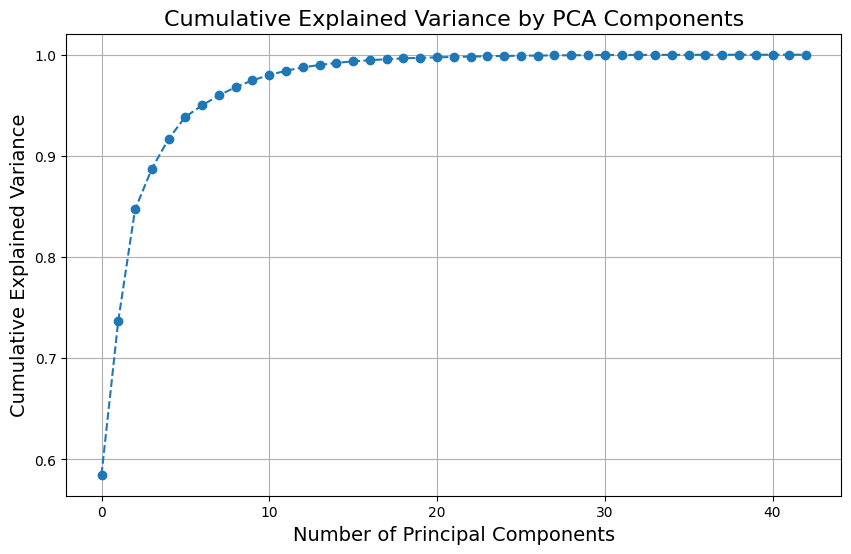

In [55]:
plt.figure(figsize=(10, 6))
plt.plot(np.cumsum(explained_variance), marker='o', linestyle='--')
plt.title('Cumulative Explained Variance by PCA Components', fontsize=16)
plt.xlabel('Number of Principal Components', fontsize=14)
plt.ylabel('Cumulative Explained Variance', fontsize=14)
plt.grid()
plt.show()

In [56]:
pca_df = pd.DataFrame(
    data=pca_result,
    columns=[f'PC{i+1}' for i in range(pca_result.shape[1])]
)

C:\Users\hewan\AppData\Local\Temp\ipykernel_52980\1543310071.py:2: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(


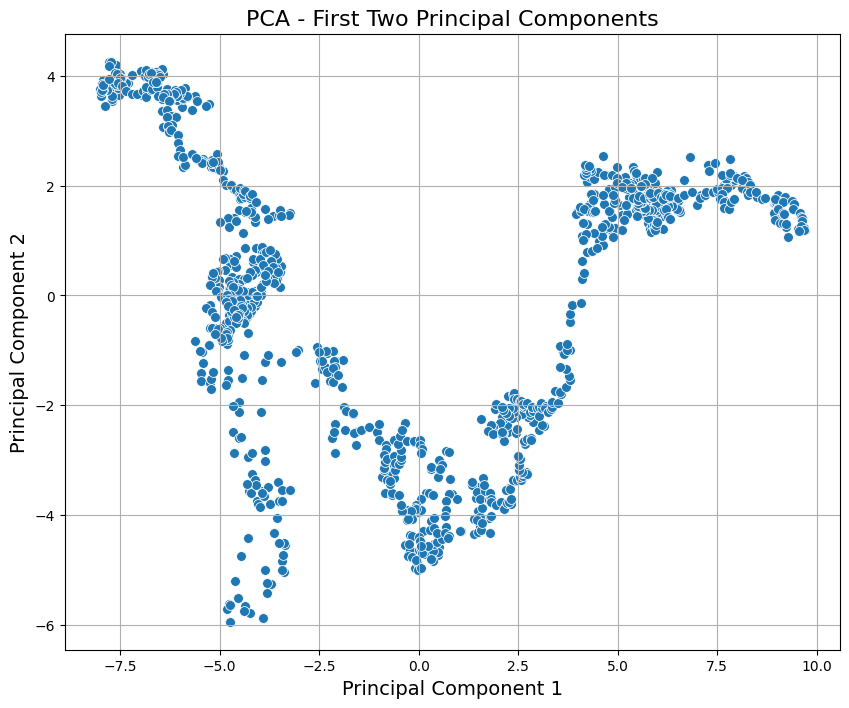

In [57]:
plt.figure(figsize=(10, 8))
sns.scatterplot(
    x=pca_df['PC1'],
    y=pca_df['PC2'],
    palette='viridis',
    s=50
)
plt.title('PCA - First Two Principal Components', fontsize=16)
plt.xlabel('Principal Component 1', fontsize=14)
plt.ylabel('Principal Component 2', fontsize=14)
plt.grid()
plt.show()

In [58]:
explained_variance_df = pd.DataFrame({
    'Principal Component': [f'PC{i+1}' for i in range(len(explained_variance))],
    'Explained Variance Ratio': explained_variance
})
print(explained_variance_df)

   Principal Component  Explained Variance Ratio
0                  PC1                  0.584919
1                  PC2                  0.152256
2                  PC3                  0.109918
3                  PC4                  0.040181
4                  PC5                  0.029630
5                  PC6                  0.021736
6                  PC7                  0.011315
7                  PC8                  0.009933
8                  PC9                  0.008058
9                 PC10                  0.006739
10                PC11                  0.005328
11                PC12                  0.004115
12                PC13                  0.003439
13                PC14                  0.002260
14                PC15                  0.002056
15                PC16                  0.001612
16                PC17                  0.001064
17                PC18                  0.001039
18                PC19                  0.000783
19                PC

In [102]:
X = df[['VIX']]
y = df['Y']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LogisticRegression(random_state=42)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

print("classification Report: ")
print(classification_report(y_test, y_pred))

print("\n Model Coefficients: ")
print(f"VIX Coefficients: {model.coef_[0][0]:.4f}")
print(f"Intercept: {model.coef_[0][0]:.4f}")

classification Report: 
              precision    recall  f1-score   support

           0       0.87      0.95      0.91       177
           1       0.71      0.43      0.54        46

    accuracy                           0.85       223
   macro avg       0.79      0.69      0.72       223
weighted avg       0.84      0.85      0.83       223


 Model Coefficients: 
VIX Coefficients: 0.2327
Intercept: 0.2327


In [110]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.model_selection import TimeSeriesSplit
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
import pickle

In [111]:
X = df[['VIX']]
y = df['Y']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LogisticRegression(random_state=42, max_iter=1000, C=0.1, class_weight='balanced', solver='lbfgs')
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

print("classification Report: ")
print(classification_report(y_test, y_pred))

print("\n Model Coefficients: ")
print(f"VIX Coefficients: {model.coef_[0][0]:.4f}")
print(f"Intercept: {model.coef_[0][0]:.4f}")

classification Report: 
              precision    recall  f1-score   support

           0       0.93      0.81      0.87       177
           1       0.51      0.76      0.61        46

    accuracy                           0.80       223
   macro avg       0.72      0.79      0.74       223
weighted avg       0.84      0.80      0.82       223


 Model Coefficients: 
VIX Coefficients: 0.2392
Intercept: 0.2392


In [112]:
from sklearn.ensemble import IsolationForest
from sklearn.metrics import classification_report
import numpy as np

X = df[['VIX']]

iso_forest = IsolationForest(
    n_estimators=200, # number of trees
    contamination=0.20, # expected proportion of outliers
    random_state=42,
    n_jobs=-1 # Use all CPU cores on my pc
)

predictions = iso_forest.fit_predict(X) 

y_pred = np.where(predictions == -1, 1, 0)

print("Classification Report: ")
print(classification_report(y, y_pred))

Classification Report: 
              precision    recall  f1-score   support

           0       0.87      0.88      0.88       874
           1       0.55      0.51      0.53       237

    accuracy                           0.80      1111
   macro avg       0.71      0.70      0.70      1111
weighted avg       0.80      0.80      0.80      1111



In [113]:
anomaly_scores=iso_forest.score_samples(X)
print("\nAnomaly Score Statistics:")
print(f"Mean Score: {np.mean(anomaly_scores):.4f}")
print(f"Min Score: {np.min(anomaly_scores):.4f}")
print(f"Max Score: {np.max(anomaly_scores):.4f}")


Anomaly Score Statistics:
Mean Score: -0.4733
Min Score: -0.8160
Max Score: -0.4283


In [114]:
X = df[['VIX', 'DXY', 'GTDEM2Y', 'EONIA', 'GTITL30YR', 'GTITL2YR', 'GTITL10YR', 'GTJPY30YR', 'GTJPY2YR']]
y = df['Y']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LogisticRegression(
    random_state=42, 
    max_iter=1000, 
    C=0.1, 
    class_weight='balanced', 
    solver='lbfgs',
    n_jobs=-1
    )

model.fit(X_train, y_train)

y_pred = model.predict(X_test)

print("classification Report: ")
print(classification_report(y_test, y_pred))

print("\nModel Coefficients: ")
print(f"VIX Coefficients: {model.coef_[0][0]:.4f}")
print(f"Intercept: {model.coef_[0][0]:.4f}")

classification Report: 
              precision    recall  f1-score   support

           0       0.94      0.82      0.88       177
           1       0.54      0.80      0.65        46

    accuracy                           0.82       223
   macro avg       0.74      0.81      0.76       223
weighted avg       0.86      0.82      0.83       223


Model Coefficients: 
VIX Coefficients: 0.2388
Intercept: 0.2388


              precision    recall  f1-score   support

           0       0.89      0.97      0.93       177
           1       0.83      0.52      0.64        46

    accuracy                           0.88       223
   macro avg       0.86      0.75      0.78       223
weighted avg       0.87      0.88      0.87       223



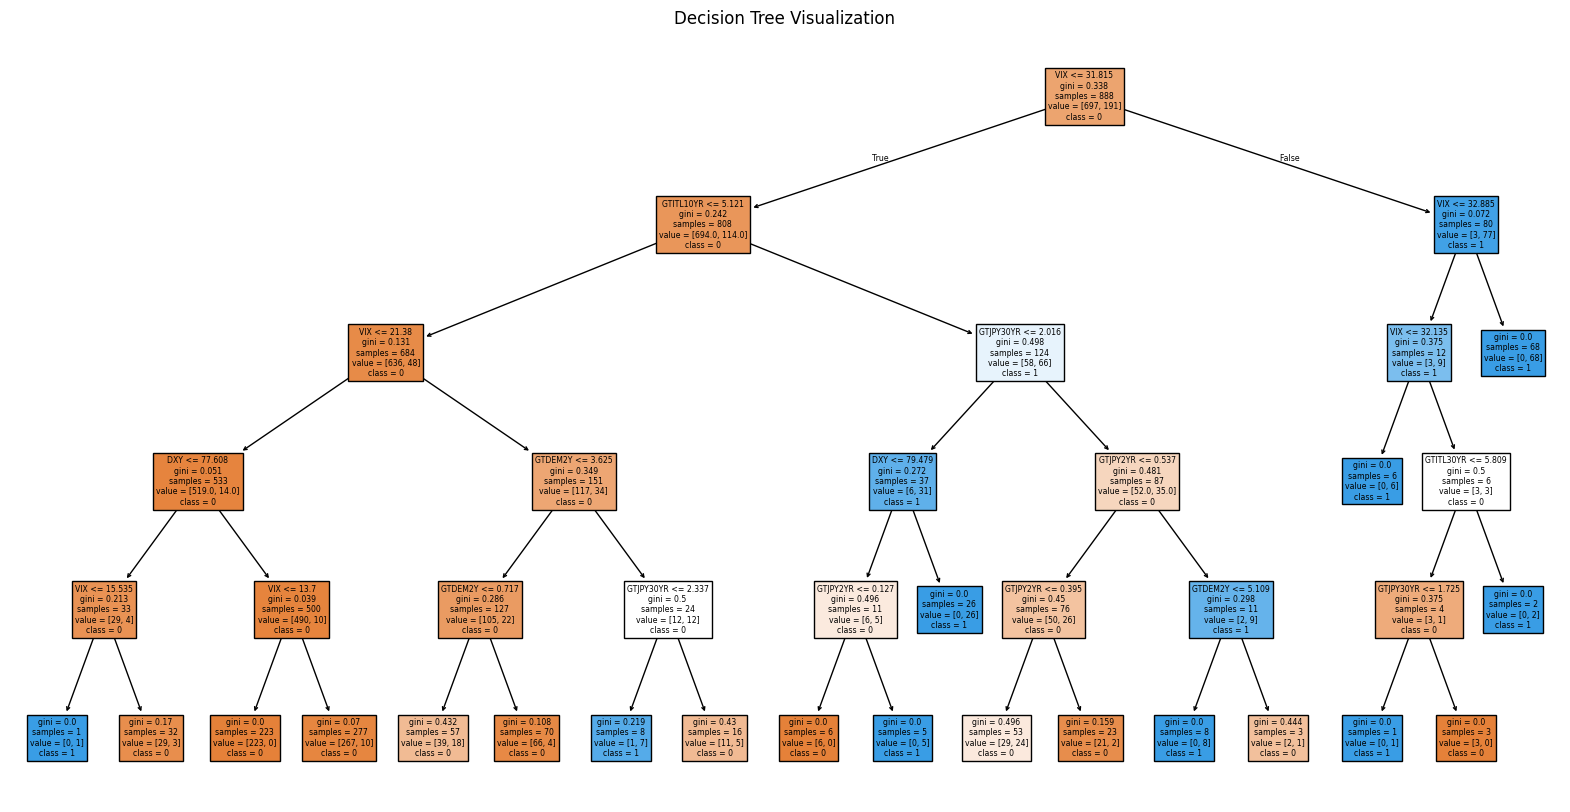

In [115]:
from sklearn.tree import DecisionTreeClassifier, plot_tree
import matplotlib.pyplot as plt

dt = DecisionTreeClassifier(max_depth=5, random_state=42)
dt.fit(X_train, y_train)

print(classification_report(y_test, dt.predict(X_test)))

plt.figure(figsize=(20, 10))

plot_tree(dt, feature_names=X.columns, class_names=['0', '1'], filled=True)

plt.title("Decision Tree Visualization")
plt.show()

In [116]:
from sklearn.preprocessing import StandardScaler
X = df[['VIX', 'DXY']]
y = df['Y']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scalar = StandardScaler()
X_train_scaled = scalar.fit_transform(X_train)
X_test_scaled = scalar.transform(X_test)

model = LogisticRegression(
    random_state=42, 
    max_iter=1000, 
    C=0.1, 
    class_weight='balanced', 
    solver='lbfgs',
    n_jobs=-1
    )

model.fit(X_train, y_train)

y_pred = model.predict(X_test)

print("classification Report: ")
print(classification_report(y_test, y_pred))

print("\nModel Coefficients: ")
print(f"VIX Coefficients: {model.coef_[0][0]:.4f}")
print(f"Intercept: {model.coef_[0][0]:.4f}")

classification Report: 
              precision    recall  f1-score   support

           0       0.93      0.81      0.87       177
           1       0.51      0.76      0.61        46

    accuracy                           0.80       223
   macro avg       0.72      0.79      0.74       223
weighted avg       0.84      0.80      0.82       223


Model Coefficients: 
VIX Coefficients: 0.2391
Intercept: 0.2391


In [117]:
def create_financial_time_split(df, train_years=4, validation_weeks=52, test_weeks=52):
    df['Data'] = pd.to_datetime(df['Data'])
    df = df.sort_values('Data')

    train_size = train_years * 52
    total_required_Size = train_size + validation_weeks + test_weeks

    if len(df) < total_required_Size:
        raise ValueError("Not enough data for specified split sized")

    train_end = train_size
    val_end = train_end + validation_weeks

    train_data = df.iloc[:train_end]
    validation_data = df.iloc[train_end:val_end]
    test_data = df.iloc[val_end:val_end + test_weeks]


    print(f"Training Period: {train_data['Data'].min()} to {train_data['Data'].max()}")
    print(f"Validation Period: {validation_data['Data'].min()} to {validation_data['Data'].max()}")
    print(f"Testing Period: {test_data['Data'].min()} to {test_data['Data'].max()}")

    return train_data, validation_data, test_data

In [118]:
train_data, val_data, test_data = create_financial_time_split(df)

Training Period: 2000-01-11 00:00:00 to 2003-12-30 00:00:00
Validation Period: 2004-01-06 00:00:00 to 2004-12-28 00:00:00
Testing Period: 2005-01-04 00:00:00 to 2005-12-27 00:00:00


In [119]:
from sklearn.ensemble import IsolationForest
from sklearn.metrics import classification_report
import numpy as np

df[f'VIX_MA5'] = df['VIX'].rolling(window=5).mean()
df[f'VIX_MA10'] = df['VIX'].rolling(window=10).mean()
df[f'VIX_MA15'] = df['VIX'].rolling(window=15).mean()
df[f'VIX_MA20'] = df['VIX'].rolling(window=20).mean()
# For Example you can also add
df[f'VIX_MA_Cross'] = (df['VIX_MA5'] > df['VIX_MA20']).astype(int)

X = df[['VIX', 'VIX_MA_Cross']]


iso_forest = IsolationForest(
    n_estimators=200, # number of trees
    contamination=0.20, # expected proportion of outliers
    random_state=42,
    n_jobs=-1 # Use all CPU cores on my pc
)

predictions = iso_forest.fit_predict(X) 

y_pred = np.where(predictions == -1, 1, 0)

print("Classification Report: ")
print(classification_report(y, y_pred))



Classification Report: 
              precision    recall  f1-score   support

           0       0.87      0.88      0.87       874
           1       0.53      0.49      0.51       237

    accuracy                           0.80      1111
   macro avg       0.70      0.69      0.69      1111
weighted avg       0.79      0.80      0.80      1111

